**Задача:**

Даны группы населения, выделенные по таким признакам, как возраст, пол, семейное положение, образование, род занятий, и другим. Нужно предсказать, превзойдёт ли годовой доход в данной группе $50000 или нет.

In [1]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

1. Чтение данных

In [7]:
import io
data_raw = pd.read_csv('salary.csv')

In [8]:
data_raw.shape

(32561, 15)

In [9]:
data_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
data_raw.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Пропущенных значений нет - `Non-Null Count` для каждого столбца совпадает с числом строк таблицы:

In [11]:
data_raw.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Преобразуем столбцы с категориальными признаками в категориальные типы данных:

In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
data_raw['workclass'] = data_raw['workclass'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['marital-status'] = data_raw['marital-status'].astype('category')
data_raw['occupation'] = data_raw['occupation'].astype('category')
data_raw['relationship'] = data_raw['relationship'].astype('category')
data_raw['race'] = data_raw['race'].astype('category')
data_raw['sex'] = data_raw['sex'].astype('category')
data_raw['native-country'] = data_raw['native-country'].astype('category')
data_raw['salary'] = data_raw['salary'].astype('category')

In [14]:
data_raw['education'].dtype

CategoricalDtype(categories=[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
                  ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
                  ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
                  ' Preschool', ' Prof-school', ' Some-college'],
, ordered=False, categories_dtype=object)

In [15]:
data_raw.describe(include=['category'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [16]:
data_raw.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Числовые характеристики датасета:

In [17]:
data_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Средний возраст среди групп - примерно `38.58`, среднее время работы в неделю - примерно `40` часов, в среднем каждую группу представляют (`fnlwgt`) примерно `190000` человек.

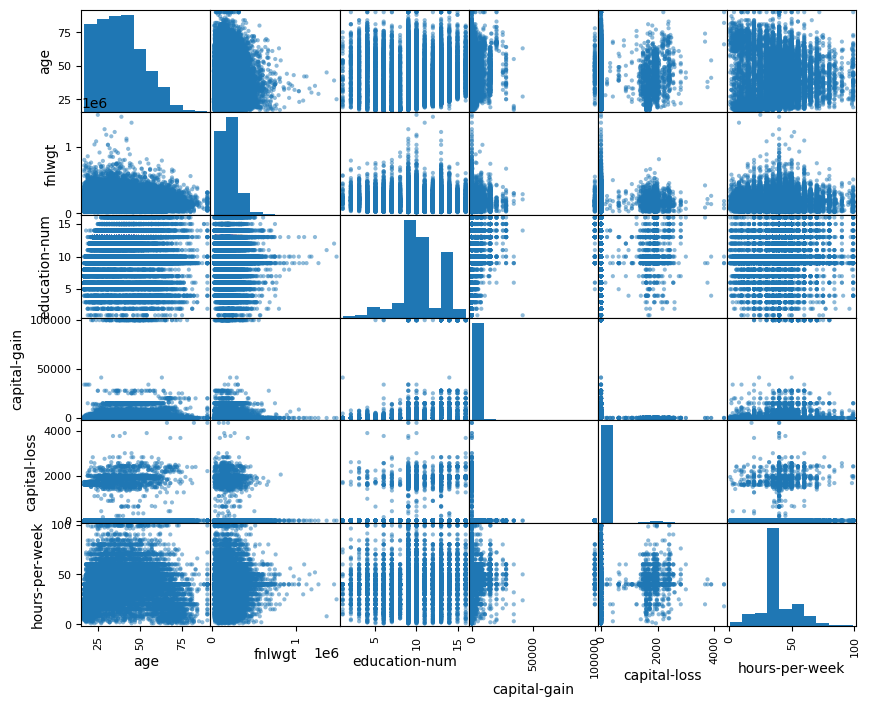

In [18]:
pd.plotting.scatter_matrix(data_raw, figsize=(10,8))
pass

Явных линейных зависимостей одного признака от другого нет.

In [18]:
data = data_raw

In [19]:
((data['salary'] == ' <=50K').sum(), (data['salary'] == ' >50K').sum())

(24720, 7841)

<Axes: xlabel='salary', ylabel='count'>

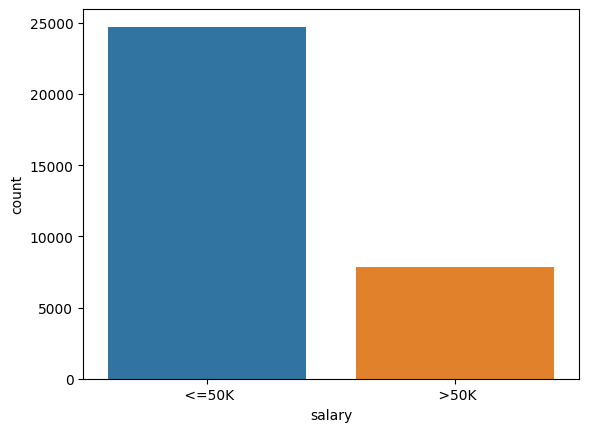

In [20]:
sns.countplot(x='salary', data=data)

Классы несбалансированные - число групп с доходом не больше \$50000 и больше \$50000 различаются примерно в 3 раза.

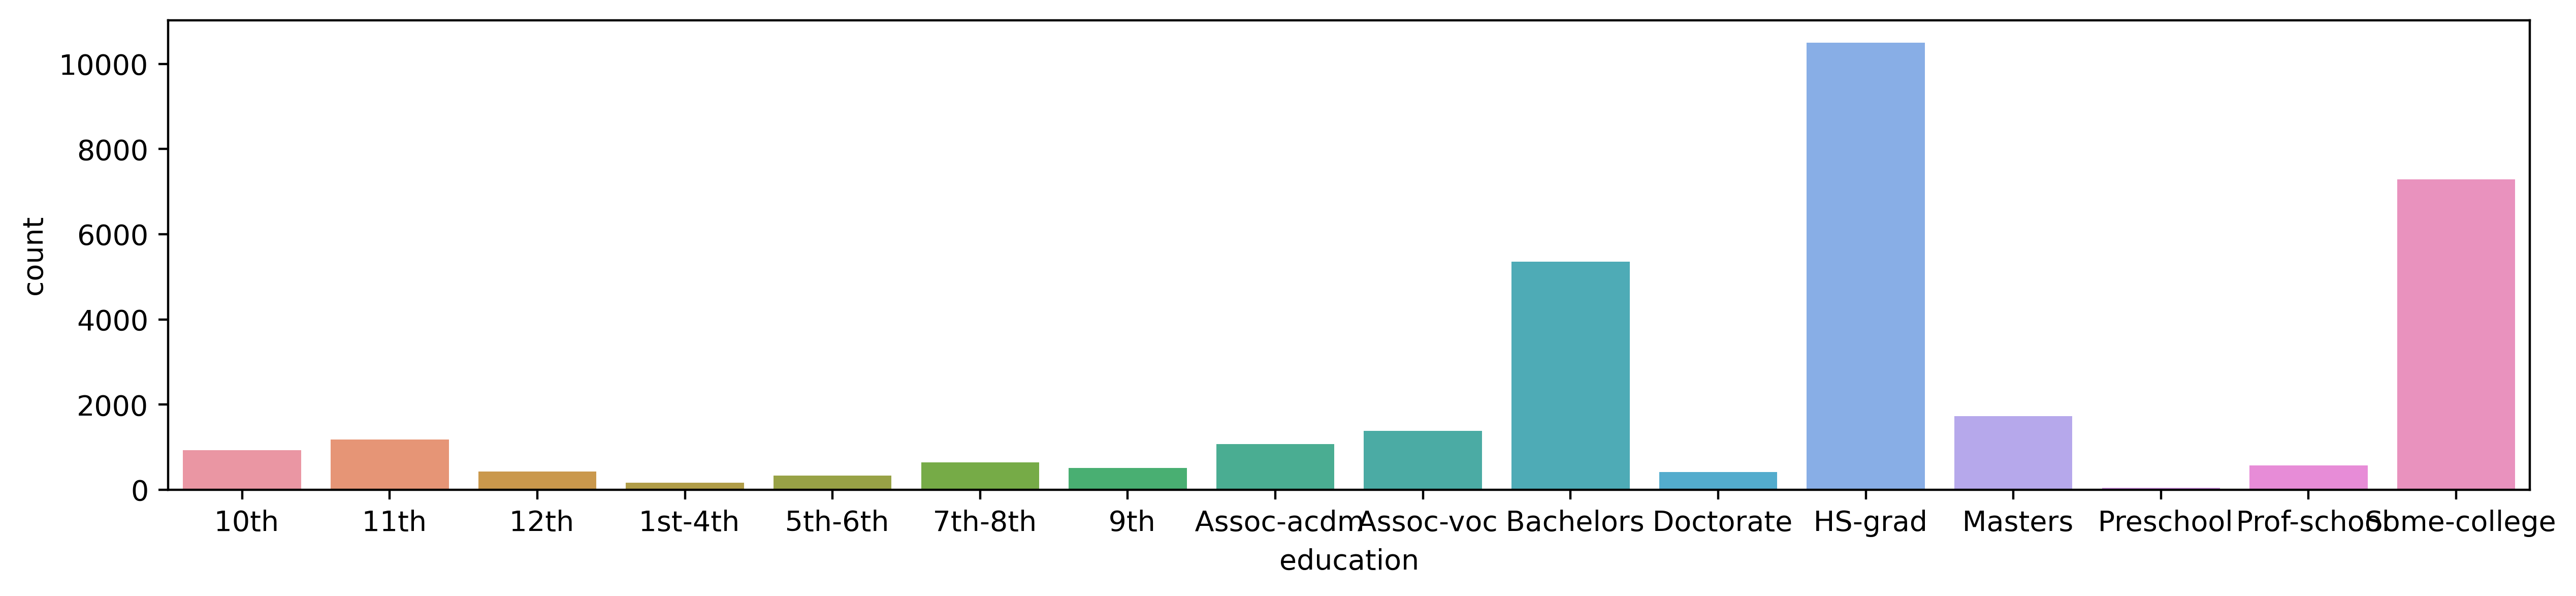

In [21]:
plt.figure(figsize=(15,3), dpi=400)
sns.countplot(x='education', data=data)
pass

Больше всего выпускников старшей школы (`HS-grad`), поступивших в колледж, но неокончивших его (`Some-college`), и бакалавров (`Bacherlors`).

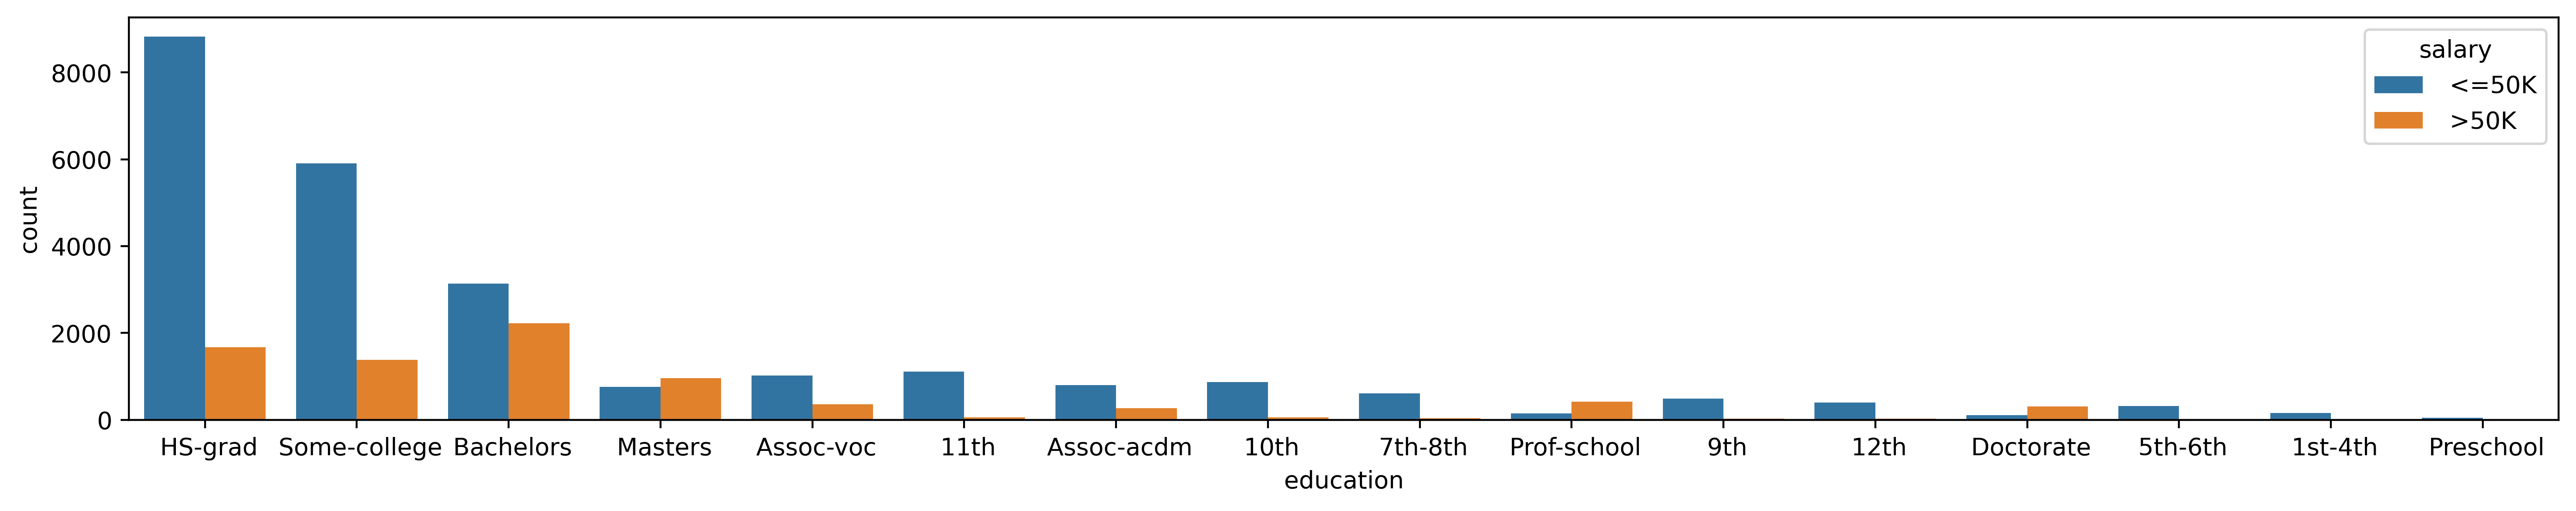

In [22]:
plt.figure(figsize=(18,3), dpi=400)
sns.countplot(x='education', order=data['education'].value_counts().index, hue='salary', data=data)
pass

Можно видеть, что доходы не больше \$50000 преобладают во всех видах образования, кроме магистров (`Masters`), выпускников профессиональных школ (`Prof-school`) и доктора наук (`Doctorate`).

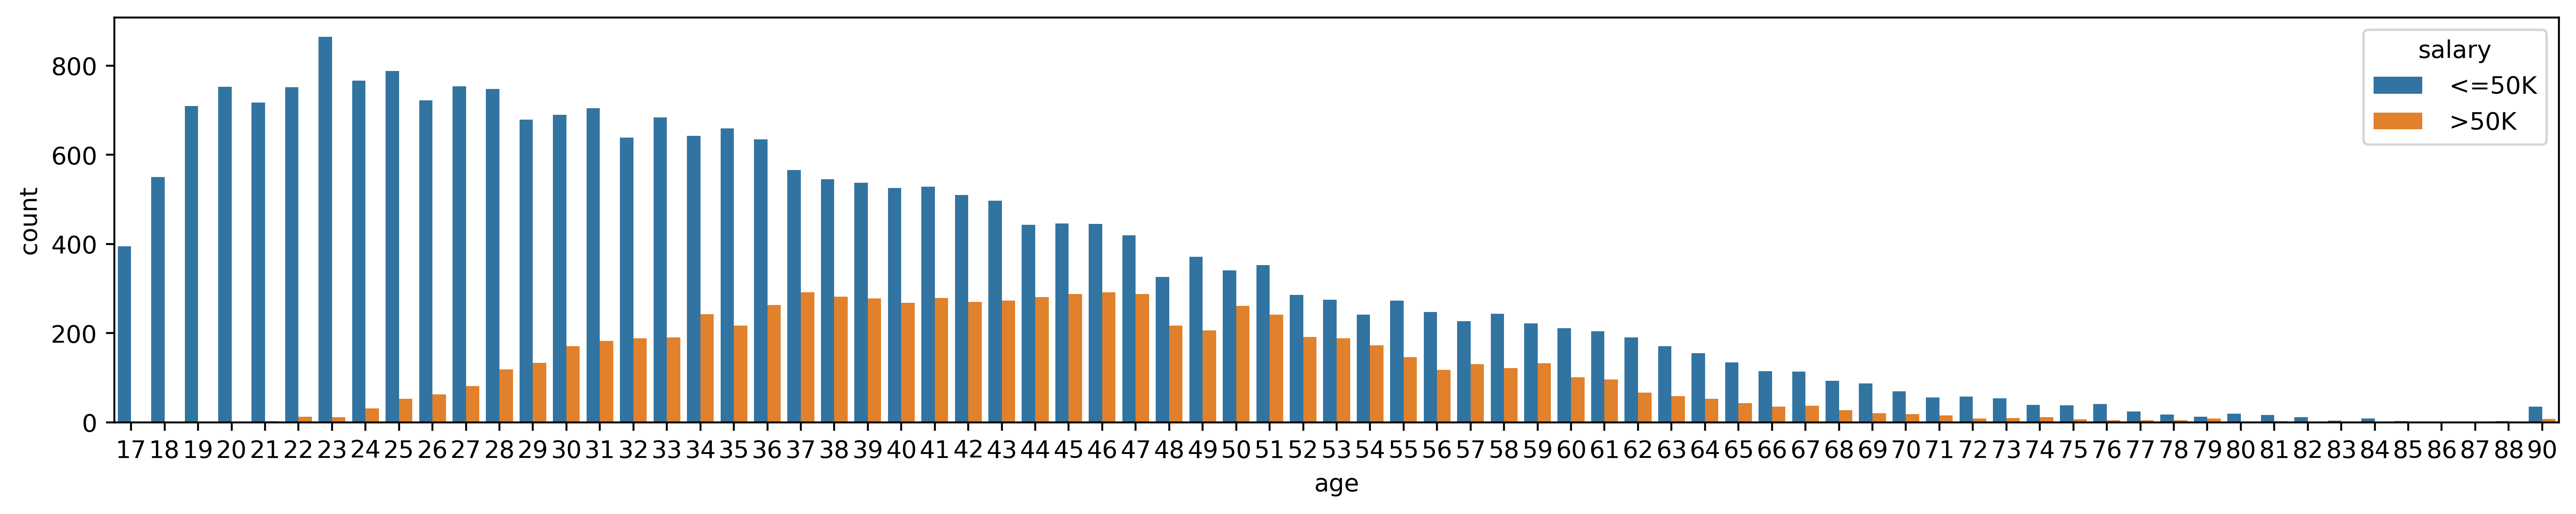

In [23]:
plt.figure(figsize=(18,3), dpi=400)
sns.countplot(x='age', hue='salary', data=data)
pass

Доходы не больше \$50000, в основном, в группах, где возраст порядка 20-40 лет, больше \$50000 - при возрасте порядка 35-55 лет. Разумное объяснение - с возрастом опыт профессиональной деятельности растёт, поэтому выше шанс получить высокооплачиваемую должность.

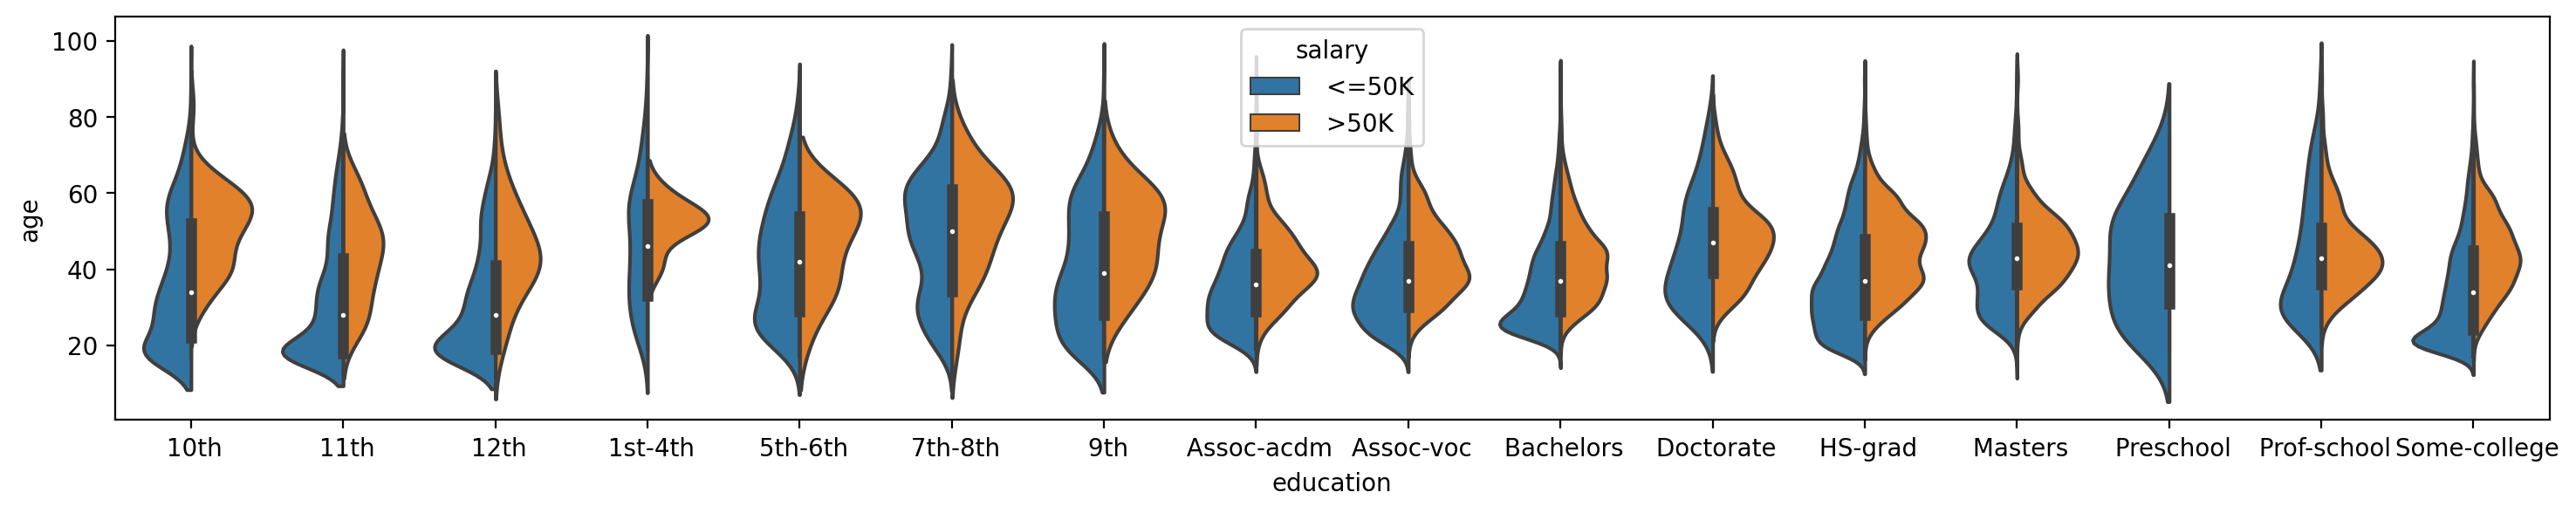

In [24]:
plt.figure(figsize=(18,3), dpi=200)
sns.violinplot(x='education', y='age', hue='salary', split=True, data=data)
pass

Вне зависимости от образования средний возраст зарабатывающих больше \$50000 больше, чем у зарабатывающих не больше \$50000.

In [25]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


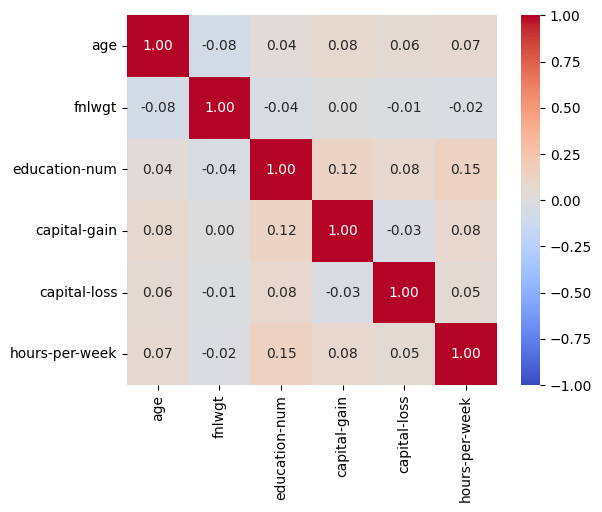

In [26]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Коэффициенты корреляции малы по модулю, поэтому нет хорошо наблюдаемых линейных зависимостей между числовыми признаками.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
 14  salary          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


Подготовим датасет к применению методов машинного обучения. Выделим столбец `salary` отдельно как метки. Удалим столбец `fnlwgt`, потому что он хранит число человек в каждой группе и ничего не говорит о заработке. Категориальные признаки бинаризируем методом one-hot-encoding.

In [28]:
X = data.drop(['fnlwgt', 'salary'], axis=1)
y = data['salary']
y = y.replace(to_replace = ' <=50K', value=0)
y = y.replace(to_replace =  ' >50K', value=1)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  32561 non-null  category
dtypes: category(8), int64(5)
memory usage: 1.5 MB


In [30]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X[['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'native-country']])
dummies = pd.DataFrame(enc.transform(X[['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'native-country']]),
                       columns=enc.get_feature_names_out(), index=X.index)
X = pd.concat((X, dummies), axis=1).drop(['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'native-country'], axis=1)

Также нормализуем признаки, потому что их масштаб существенно различается - например, у `capital-gain` и `hours-per-week`. Это нужно для улучшения результата при использовании метода K ближайших соседей.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [32]:
X.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17,-2.225833e-17,-3.927941e-17,-5.673693e-18,-2.836846e-18,-2.793203e-17,...,-1.636642e-17,1.571176e-17,7.310335e-18,1.549355e-17,0.000000,2.618627e-18,-8.728758e-18,1.414059e-16,2.302210e-17,5.237255e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,-1.516792e+00,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,-2.932948e+00,-4.540836e-02,-2.217266e-02
25%,-7.757679e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,-1.516792e+00,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02
50%,-1.159546e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,6.592860e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02
75%,6.904838e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,6.592860e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02
max,3.769612e+00,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00,4.090813e+00,5.737396e+00,3.815376e+00,6.819510e+01,6.592860e-01,...,2.964839e+01,1.687077e+01,5.208087e+01,2.014975e+01,25.247792,4.251993e+01,4.138522e+01,3.409539e-01,2.202238e+01,4.510058e+01


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 34)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(24420, 8141)

Будем использовать для решения задачи классификации `kNN` (k ближайших соседей), `Random Forest` и `MLP` (многослойную полносвязную нейронную сеть). `Random Forest` воспользуемся потому, что он хорош, когда в задаче много текстовых признаков, а `MLP` - для сравнения с другими методами, без практической мотивации.

**Замечание**: приведённые далее проценты ошибок могут отличаться от запуска к запуску, поскольку некоторые алгоритмы рандомизированы.

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.023095823095823097, 0.1590713671539123)

Ошибка на тренировочной выборке - порядка 2%, на тестовой выборке - порядка 15.9%. Имеет место переобучение.

Посмотрим на важность признаков:

In [64]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
feature_scores

age                                      0.231917
hours-per-week                           0.115205
capital-gain                             0.109500
education-num                            0.069218
marital-status_ Married-civ-spouse       0.069215
relationship_ Husband                    0.052874
capital-loss                             0.035507
marital-status_ Never-married            0.029134
occupation_ Exec-managerial              0.017816
occupation_ Prof-specialty               0.016886
sex_ Male                                0.014311
education_ Bachelors                     0.013405
workclass_ Private                       0.012209
relationship_ Not-in-family              0.011869
relationship_ Own-child                  0.009860
workclass_ Self-emp-not-inc              0.009713
relationship_ Wife                       0.008753
education_ HS-grad                       0.008634
occupation_ Sales                        0.008379
race_ White                              0.008130


Попробуем теперь метод K ближайших соседей (K=7):

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.13185913185913187, 0.17651394177619456)

На тренировочной выборке ошибка 13.1%, на тестовой - 17.65%.

Попробуем убрать признак 'native-country':

In [94]:
X = data.drop(['fnlwgt', 'salary', 'native-country'], axis=1)
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X[['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex']])
dummies = pd.DataFrame(enc.transform(X[['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex']]),
                       columns=enc.get_feature_names_out(), index=X.index)
X = pd.concat((X, dummies), axis=1).drop(['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 34)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape


In [80]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.022194922194922195, 0.15538631617737378)

In [81]:
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.1126945126945127, 0.1477705441591942)

Теперь kNN показал результат получше на тестовой выборке - ошибка 14.7%.

Попробуем также нейронную сеть:

In [57]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20,10,10))
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.15982800982800982, 0.1686524996929124)

Ошибки на тренировочной и тестовой выборках - 16% и 16.9% соответственно. Хуже, чем в предыдущих методах.

Попробуем также убрать `relationship`:

In [91]:
X = data.drop(['fnlwgt', 'salary', 'native-country', 'relationship'], axis=1)
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X[['workclass', 'education', 'marital-status',
           'occupation', 'race', 'sex']])
dummies = pd.DataFrame(enc.transform(X[['workclass', 'education', 'marital-status',
           'occupation', 'race', 'sex']]),
                       columns=enc.get_feature_names_out(), index=X.index)
X = pd.concat((X, dummies), axis=1).drop(['workclass', 'education', 'marital-status',
           'occupation', 'race', 'sex'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 34)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [93]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.023095823095823097, 0.15882569708880973)

In [75]:
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.11597051597051597, 0.15428080088441223)

In [76]:
model = MLPClassifier(hidden_layer_sizes=(20,10,10))
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.17833742833742833, 0.18867460999877164)

Все методы показали результаты хуже, чем ранее.

Остановимся на `kNN` и попробуем подобрать оптимальный гиперпараметр - число соседей:

In [97]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([5,7,10,20])
param_grid = dict(n_neighbors=k_arr)

grid = GridSearchCV(KNeighborsClassifier(p=1), param_grid, scoring='accuracy', return_train_score=False, verbose=1)
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


(0.8580262080262081, {'n_neighbors': 10})

In [98]:
y_train_prediction = grid.predict(X_train)
y_test_prediction = grid.predict(X_test)
(y_train != y_train_prediction).mean(), (y_test != y_test_prediction).mean()

(0.1194103194103194, 0.14383982311755314)

Оптимальный параметр `k=10` дал результат ещё лучше - ошибка 14.4%.

Посчитаем также основные характеристики по результату классификации:

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6152
           1       0.75      0.61      0.67      1989

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



Общие выводы:
1. Числовые признаки в задаче мало коррелируют между собой, поэтому не было смысла избавляться от некоторых из них для упрощения обучения;
2. Понадобилась нормировка признаков, поскольку они имеют разные масштаб и промежуток значений;
3. Удаление одних признаков (`native-country`) улучшило результаты классификации, удаление других (`relationship`) - ухудшило результаты;
4. Лучшим методом оказался `kNN`, худшим - `MLP`;
5. Оптимальный результат получился с методом `kNN` при `k=10` и удалённых столбцах `native-country` и `education-num`.